<a href="https://colab.research.google.com/github/adamlinc/notebooks/blob/master/desafio_advanced_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Desafio-advanced-analytics



## 1 - Descrição do problema

### 1.1 - Produção de Bombons:

*   Variabilidade no processo, necessidade de modelar processo industrial
*   Diferentes variáveis de processo impactam de maneira diferente o peso ﬁnal dos bombons
*   Peso do bombom deve ser de 10g, com limite para baixo de 10% (9g)
*   Bombons acima e abaixo do peso aumentam custos de produção, mas bombons abaixo de 9 gramas aumentão de forma mais abrupta.

### 1.2 - Variáveis

<table style="width:50%">
<tr>
<th>Variável:</th>
<th>Definição:</th>
<th>Variable Notes:</th>
</tr>

<tr>
<td>PESO BOMBOM</td>
<td>Massa</td>
<td>Peso composto pela média de bombons produzidos (total do lote)</td>
</tr>
  
<tr>
<td>QTD_CHOC</td>
<td>Quantidade de chocolate</td>
<td>Variável Dependente</td>
</tr>
  
  
<tr>
<td>VAR_1</td>
<td>Variável de processo 1</td>
<td>Não controlável</td>
</tr>
  
  
<tr>
<td>VAR_2</td>
<td>Variável de processo 2</td>
<td>Não controlável</td>
</tr>
  
</table>

Processo da produção e suas variáveis.

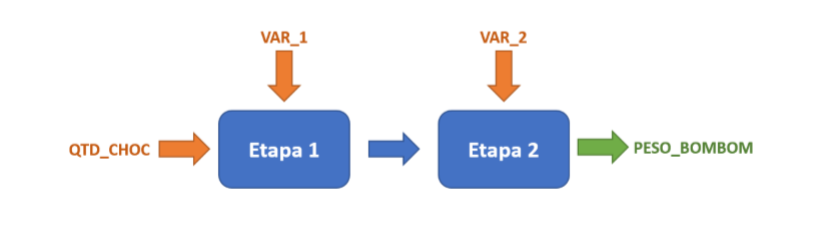

## 2 - Bibliotecas

In [0]:
import pandas as pd
from google.colab import drive
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
#from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## 3 - Importando datasets

In [0]:
#Montando o drive do Google Docs
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Listando o diretório para ver o nome dos arquivos
os.listdir('/content/drive/My Drive/GitHub/desafio-advanced-analytics') #Verificando os arquivos do diretorio

['analise-preditiva.xlsx',
 'analise-prescritiva.xlsx',
 'desafio-advanced-analytics.pdf',
 'registros-prod.xlsx']

In [0]:
df_prod = pd.read_excel('/content/drive/My Drive/GitHub/desafio-advanced-analytics/registros-prod.xlsx')
df_preditiva = pd.read_excel('/content/drive/My Drive/GitHub/desafio-advanced-analytics/analise-preditiva.xlsx')
df_prescritiva = pd.read_excel('/content/drive/My Drive/GitHub/desafio-advanced-analytics/analise-prescritiva.xlsx')

## 4 - Análise Descritiva

#### 4.1 - Dados gerais e Estatísticos

Visualizando uma pequena parte do dataset é possivel verificar que possuimos 3 variáveis contínuas, e uma variável categorica.

In [0]:
#Verificando brevemente os dados que foram disponibilizados
df_prod.head()

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM
0,191.84,0.96,C,4.543124
1,311.08,0.38,C,6.128060
2,287.47,0.53,C,6.397409
3,272.03,0.73,C,6.470697
4,112.91,2.05,B,6.963430


In [0]:
# Vamos agora verificar o tipo de dados, quantidade e se possui algum campo NULL.
df_prod.info()

'Alem de verificar os tipos de dados podemos ver também que não temos campos NULL ou N/A'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
QTD_CHOC       500 non-null float64
VAR_1          500 non-null float64
VAR_2          500 non-null object
PESO_BOMBOM    500 non-null float64
dtypes: float64(3), object(1)
memory usage: 15.8+ KB


'Alem de verificar os tipos de dados podemos ver também que não temos campos NULL ou N/A'

In [0]:
# Verificando alguns dados estatisticos do dataset e distribuição dos valores.
df_prod.describe()

,QTD_CHOC,VAR_1,PESO_BOMBOM
count,500.000000,500.000000,500.000000
mean,291.264600,2.098180,10.395002
std,45.182499,0.711166,1.572233
min,112.910000,0.050000,4.543124
25%,259.267500,1.630000,9.425819
50%,295.450000,2.300000,10.334273
75%,325.137500,2.672500,11.379932
max,436.070000,2.980000,17.362728


In [0]:
#Tabela pivot para verificar quantidade de ocorrências.

Pivot_var_2 = df_prod.pivot_table(values=["QTD_CHOC"], index=["VAR_2"], aggfunc=np.count_nonzero)
print(Pivot_var_2)

Pivot_var_1 = df_prod.pivot_table(values=["VAR_1"], index=["VAR_2"], aggfunc=np.count_nonzero)
print(Pivot_var_1)

       QTD_CHOC
VAR_2          
A         158.0
B         165.0
C         177.0
       VAR_1
VAR_2       
A      158.0
B      165.0
C      177.0


#### 4.2 - Dados de Distribuição

Verificando a distribuição dos dados podemos verificar que os dados possuem uma distribuição normalizada e balanceada.

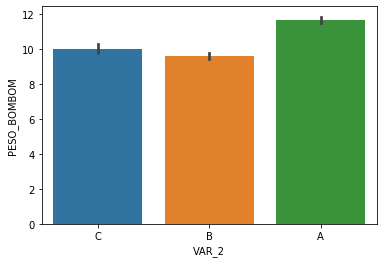

In [0]:
#plotando Peso bombom contra Var_2 para verificar a distribuição.
sns.barplot(x='VAR_2', y='PESO_BOMBOM', data=df_prod)

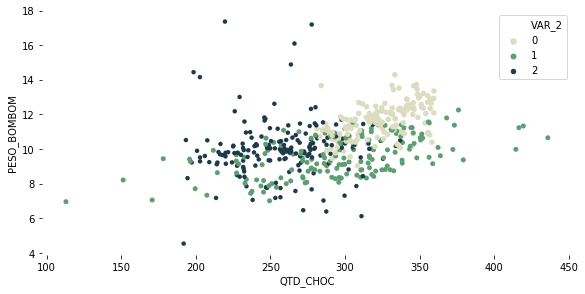

In [0]:
#plotando a distribuição da variavel VAR_2 sobre o pesso e a quantidade de chocolate
f, ax = plt.subplots(figsize=(9.5, 4.5))
sns.despine(f, left=True, bottom=True)

g_1 = sns.scatterplot(x="QTD_CHOC", y="PESO_BOMBOM",
                hue="VAR_2", size="VAR_2",
                palette="ch:r=-.6,d=.20",
                sizes=(30, 20), linewidth=0,
                data=df_prod, ax=ax)
display(g_1)

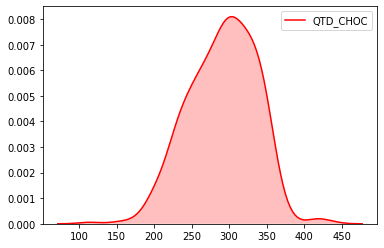

In [0]:
# VERIFICANDO AS DISTRIBUIÇÕES

#Distribuição Gaussiana ou NORMAL
g_dist= sns.kdeplot(df_prod['QTD_CHOC'], shade=True,color="r")

display(g_dist)

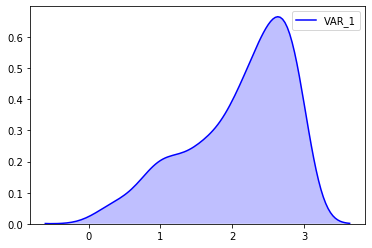

In [0]:
#Distribuição assimétrica
g_dist=sns.kdeplot(df_prod['VAR_1'], shade=True, color="b")

display(g_dist)

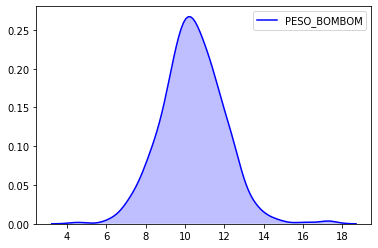

In [0]:
#Distribuição Gaussiana
g_dist=sns.kdeplot(df_prod['PESO_BOMBOM'], shade=True, color="b")

display(g_dist)

In [0]:
#Transformando a Variavel VAR_2 em uma Variavel Numerica.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_prod["VAR_2"] = label_encoder.fit_transform(df_prod["VAR_2"])
df_prod.head()

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM
0,191.84,0.96,2,4.543124
1,311.08,0.38,2,6.128060
2,287.47,0.53,2,6.397409
3,272.03,0.73,2,6.470697
4,112.91,2.05,1,6.963430


#### 4.3 - Gráfico de calor da correlação entre as nossa features

Com o gráfico abaixo podemos verificar que os dados possuem correlação muito baixa, o que pode dificultar o processo futuro de criar um modelo regressor.

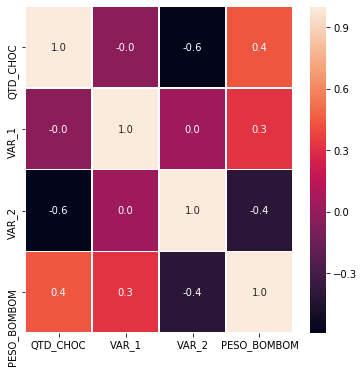

In [0]:
#Verificando a correlação entre todos as features do nosso dataset.
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(df_prod.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

No calculo abaixo eu faço uma média da quantidade de chocolate (QTD_CHOC) somente dos bombons que ficaram com o peso dentro do esperado.

In [254]:
df_filt = df_prod[(df_prod.PESO_BOMBOM >= 9.0) & (df_prod.PESO_BOMBOM <= 10.0)]

qtd1 = len(df_filt['QTD_CHOC'])
tot_qtd_choc1 = sum(df_filt['QTD_CHOC'])
media_qtd_choc1 = tot_qtd_choc1 / qtd1

print( "Média da quantidade de chocolate usada nos bombons com peso aceitavel: ", round(media_qtd_choc1,2))

print("Valor máximo da quantidade de chocolate que retornaram peso do bombom aceitavel: ",max(df_filt['QTD_CHOC']))

print("Valor mínimo da quantidade de chocolate que retornaram peso do bombom aceitavel: ",min(df_filt['QTD_CHOC']))

Média da quantidade de chocolate usada nos bombons com peso aceitavel:  270.31
Valor máximo da quantidade de chocolate que retornaram peso do bombom aceitavel:  414.61
Valor mínimo da quantidade de chocolate que retornaram peso do bombom aceitavel:  178.15


## 5 - Analise Diagnóstica

#### 5.1 - Variação geral

* Onde o peso do Bombom varia de  4.54 até 17.36
* Temos uma variação da QTD_CHOC de  112.91 até 436.07
* Temos uma variação da VAR_1 de  0.05 até 2.98
* e uma variação da VAR_2 de  0 até 2, isso é, todas as possbilidades de VAR_2.

Onde o peso do Bombom varia de  4.54 até 17.36
Temos uma variação da QTD_CHOC de  112.91 até 436.07
Temos uma variação da VAR_1 de  0.05 até 2.98
e uma variação da VAR_2 de  0 até 2 isso é, todas as possbilidades de VAR_2.


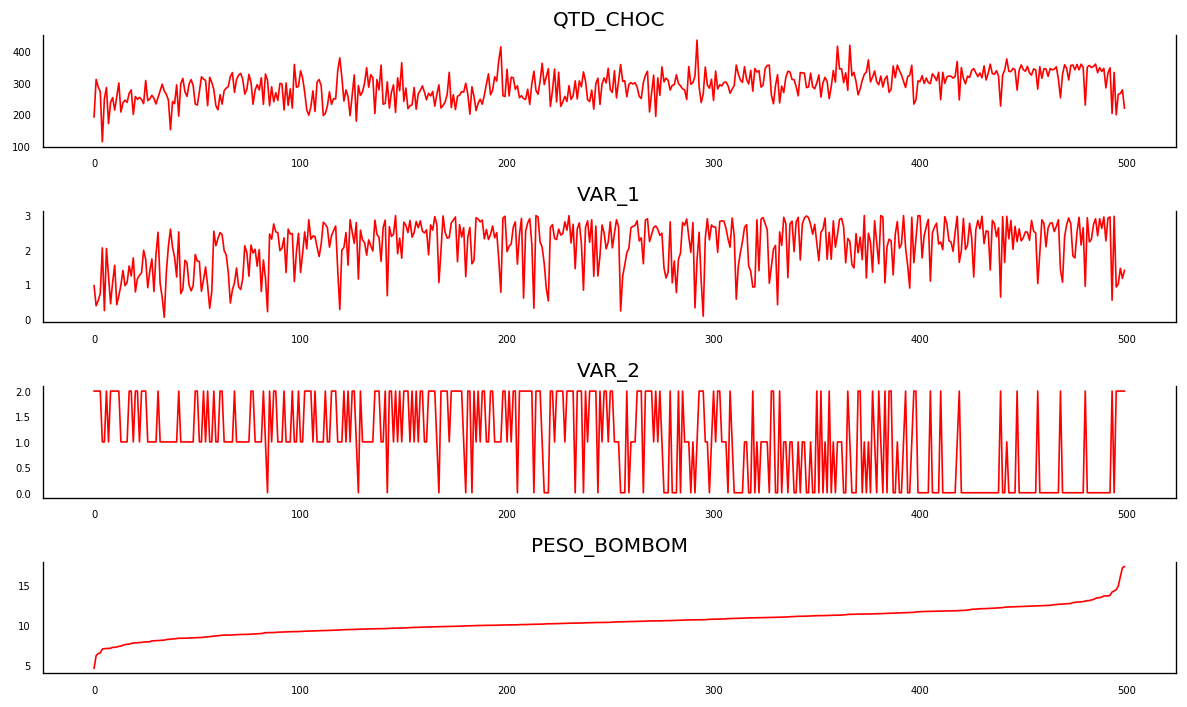

In [0]:
print("Onde o peso do Bombom varia de " , round(min(df_prod['PESO_BOMBOM']),2), "até", round(max(df_prod['PESO_BOMBOM']),2))

print("Temos uma variação da QTD_CHOC de " , round(min(df_prod['QTD_CHOC']),2), "até", round(max(df_prod['QTD_CHOC']),2))

print("Temos uma variação da VAR_1 de " , round(min(df_prod['VAR_1']),2), "até", round(max(df_prod['VAR_1']),2))

print("e uma variação da VAR_2 de " , round(min(df_prod['VAR_2']),2), "até", round(max(df_prod['VAR_2']),2), "isso é, todas as possbilidades de VAR_2.")

# Plot
fig, axes = plt.subplots(nrows=4, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df_prod[df_prod.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # titulos
    ax.set_title(df_prod.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

#### 5.2 - Variação dentro da meta de peso do Bombom de 9 a 10g

* Onde o peso do Bombom varia de  9.03 até 10.0 , isso é, dentro da meta,
* temos uma variação da QTD_CHOC de  178.15 até 414.61
* temos uma variação da VAR_1 de  0.21 até 2.98
* e uma variação da VAR_2 de  0 até 2, isso é, todas as possbilidades de VAR_2.

Onde o peso do Bombom varia de  9.03 até 10.0 , isso é, dentro da meta,
temos uma variação da QTD_CHOC de  178.15 até 414.61
temos uma variação da VAR_1 de  0.21 até 2.98
e uma variação da VAR_2 de  0 até 2 isso é, todas as possbilidades de VAR_2.


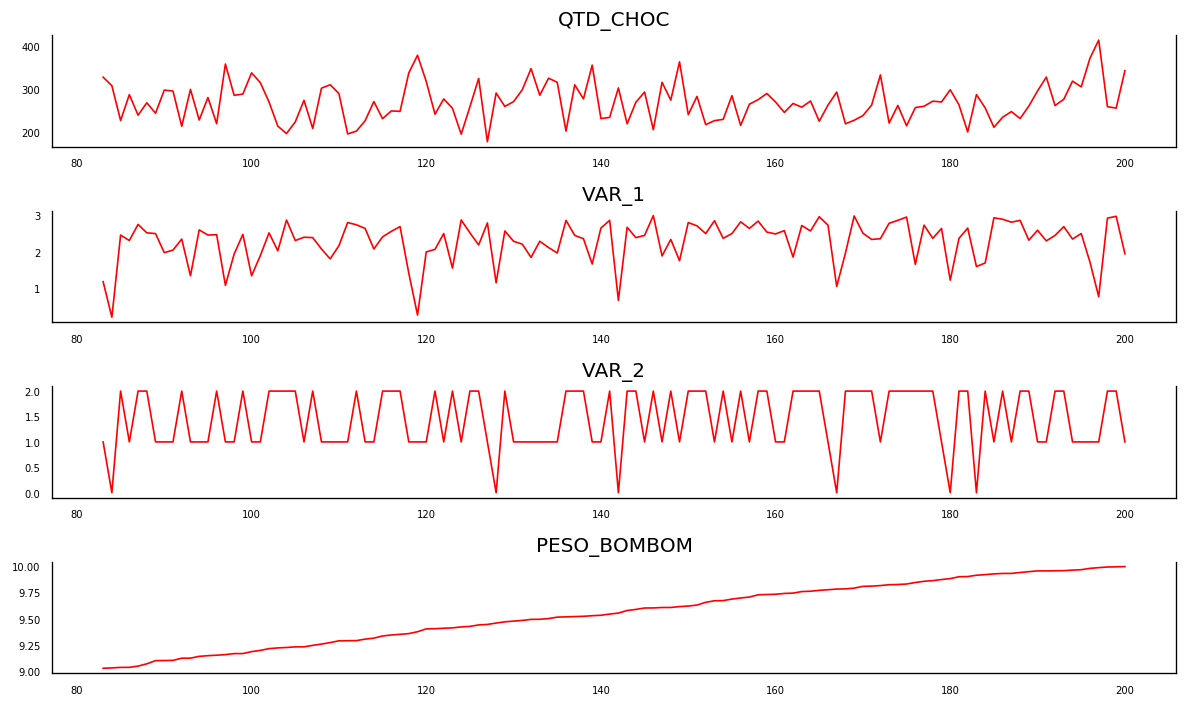

In [0]:

df_prod_9a10 = df_prod.loc[(df_prod['PESO_BOMBOM']>=9.0) & (df_prod['PESO_BOMBOM']<=10.0) ]

print("Onde o peso do Bombom varia de " , round(min(df_prod_9a10['PESO_BOMBOM']),2), "até", round(max(df_prod_9a10['PESO_BOMBOM']),2), ", isso é, dentro da meta,")

print("temos uma variação da QTD_CHOC de " , round(min(df_prod_9a10['QTD_CHOC']),2), "até", round(max(df_prod_9a10['QTD_CHOC']),2))

print("temos uma variação da VAR_1 de " , round(min(df_prod_9a10['VAR_1']),2), "até", round(max(df_prod_9a10['VAR_1']),2))

print("e uma variação da VAR_2 de " , round(min(df_prod_9a10['VAR_2']),2), "até", round(max(df_prod_9a10['VAR_2']),2), "isso é, todas as possbilidades de VAR_2.")


# Plot
fig, axes = plt.subplots(nrows=4, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df_prod_9a10[df_prod_9a10.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df_prod_9a10.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

#### 5.3 - Comparação lado a lado das variações

<table style="width:50%">
<tr>
<th>Variável:</th>
<th>Variação Geral:</th>
<th>Variação dentro da meta de 9 a 10g:</th>
</tr>

<tr>
<td>PESO BOMBOM</td>
<td>4.54 a 17.367</td>
<td>9.03 a 10.0</td>
</tr>
  
<tr>
<td>QTD_CHOC</td>
<td>112.91 a 436.07</td>
<td>178.15 a 414.61</td>
</tr>
  
  
<tr>
<td>VAR_1</td>
<td>0.05 a 2.98</td>
<td>0.21 a 2.98</td>
</tr>
  
  
<tr>
<td>VAR_2</td>
<td>A, B e C</td>
<td>A, B e C</td>
</tr>
  
</table>

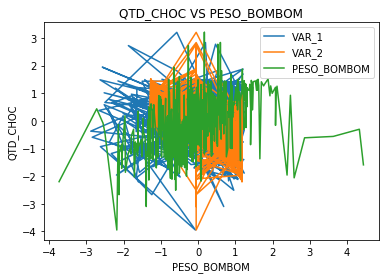

In [0]:
plt.plot(df_normalizado["VAR_1"], df_normalizado["QTD_CHOC"], label='VAR_1')
plt.plot(df_normalizado["VAR_2"], df_normalizado["QTD_CHOC"], label='VAR_2')
plt.plot(df_normalizado["PESO_BOMBOM"], df_normalizado["QTD_CHOC"], label='PESO_BOMBOM')

plt.xlabel('PESO_BOMBOM')
plt.ylabel('QTD_CHOC')

plt.title("QTD_CHOC VS PESO_BOMBOM")

plt.legend()

plt.show()

#### 5.4 Conclusão

Após verificar os dados acima onde foi constatado a baixa correlação entre os dados disponíveis e uma alta variação da QTD_CHOC, VAR_1 e VAR_2 dentro do range de bombons de 9 a 10 gramas é possivel dizer que será preciso voltar até o processo e tentar identificar e/ou colher novas informações que venham ajudar a identificar um padrão nos dados e assim chegar a um valor ótimo para a quandidade de chocolate de entrada no processo.

Mesmo diante desta visão, vou seguir com o processo para vericar o quanto podemos melhorar no processo neste primeiro momento.

## 6 - Análise Preditiva 

### 6.1 - Preparando os dados para o modelo

In [0]:
#Normalizando os dados para compor o teste dos modelos com os dados normalizados e não normalizados.

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

df_normalizado = sc_X.fit_transform(df_prod)

#transformando o dataset em um pandas dataset
df_normalizado = pd.DataFrame(data= df_normalizado)

#inserindo novamente as colunas
df_normalizado.columns = ['QTD_CHOC', 'VAR_1', 'VAR_2', 'PESO_BOMBOM']

#Arredondando os valores aceitando duas casas decimais
df_normalizado = round(df_normalizado, 2)

#Breve visualização do resultado
df_normalizado.head()

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM
0,-2.20,-1.60,1.18,-3.73
1,0.44,-2.42,1.18,-2.72
2,-0.08,-2.21,1.18,-2.55
3,-0.43,-1.93,1.18,-2.50
4,-3.95,-0.07,-0.05,-2.18


In [0]:
#Dropando as variaveis VAR_1 e VAR_2 para gerar um dataset bem menor e verificar como fica o modelo.
df_simplificado = df_prod.drop(['VAR_2'], axis=1)

df_simplificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
QTD_CHOC       500 non-null float64
VAR_1          500 non-null float64
PESO_BOMBOM    500 non-null float64
dtypes: float64(3)
memory usage: 11.8 KB


In [0]:
#separando variaveis independentes
x = df_prod.drop(['PESO_BOMBOM'], axis=1)
x[0:3]

,QTD_CHOC,VAR_1,VAR_2
0,191.84,0.96,2
1,311.08,0.38,2
2,287.47,0.53,2


In [0]:
#separando variavel dependente
y = df_prod['PESO_BOMBOM']
y[0:3]

0    4.543124
1    6.128060
2    6.397409
Name: PESO_BOMBOM, dtype: float64

In [0]:
#importando a biblioteca para fazer o split do data set em dados de treinamento e dados de teste.
from sklearn.model_selection  import train_test_split

#Fazendo a separação dos dados de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (350, 3) (350,)
Test set: (150, 3) (150,)


### 6.2 - Random Forest Regressor

Modelo escolhido para seguir com o processo devido a sua melhor performance dentro os modelos testados.

Neste ponto decidi usar Random Forest por entregar modelos precisos e mapear bem relações não lineares como é o caso dos nossos dados. Optei pela arvore de decisão Regressora pelo motivo da nossa variável dependente ser do tipo contínua.


**OBS:** Para o treinamento final foi utilizado 100% do dataset de treino, para que os 30% dos dados separados para teste também pudesse agregar valor no treinamento final do modelo.

In [0]:
from sklearn.ensemble import RandomForestRegressor
# Aplicando o modelo Random Forest

random_forest = RandomForestRegressor(n_estimators=10000)
random_forest.fit(x, y)

# previsões
y_prediction = random_forest.predict(x_test)

random_forest.score(x, y)
acc_random_forest = round(random_forest.score(x, y) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.79 %


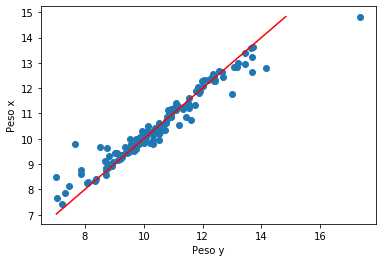

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test, y_prediction)
range = [y_test.min(), y_prediction.max()]
plt.plot(range, range, 'red')
plt.xlabel('Peso y')
plt.ylabel('Peso x')
plt.show()

In [0]:
#Mean Absolute Error
print('MAE', mean_absolute_error(y_test, y_prediction))

#Mean Squared Error
print('MSE', mean_squared_error(y_test, y_prediction))

MAE 0.2554465179604536
MSE 0.1945520116172474


In [0]:
#Cross Validation
from sklearn.model_selection import cross_val_score
resultado = cross_val_score(random_forest, x_test, y_test, cv = 5)
print('Resultado: ',resultado.mean())

Resultado:  0.1804763111659759


### 6.3 - Regressão Linear Simples

Este modelo foi testado mas não foi usado devido ao baixo nível de acertividade.

In [0]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(x_train, y_train)
# previsões
Y_prev = regression.predict(x_test)

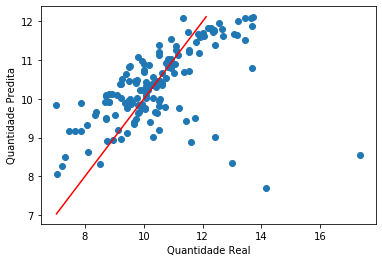

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test, Y_prev)
range = [y_test.min(), Y_prev.max()]
plt.plot(range, range, 'red')
plt.xlabel('Quantidade Real')
plt.ylabel('Quantidade Predita')
plt.show()

In [0]:
# Mean Absolute Error
print('MAE', mean_absolute_error(y_test, Y_prev))

#Mean Squared Error
print('MSE', mean_squared_error(y_test, Y_prev))

MAE 0.8426591379001477
MSE 1.8489753412413596


In [0]:
#Cross Validation
from sklearn.model_selection import cross_val_score
resultado = cross_val_score(regression, x_test, y_test, cv = 2)
print('Resultado: ',resultado.mean())

Resultado:  0.3014513378345239


### *6.4* - Gradiente Regression

Este modelo foi testado mas não foi usado devido ao baixo nível de acertividade.

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import explained_variance_score

gb = GradientBoostingRegressor(n_estimators=1000)
gb.fit(x_train,y_train)

score4 = gb.score(x_test,y_test)
pred = gb.predict(x_test)
exp_est = explained_variance_score(pred, y_test)

print("exp_est: ", exp_est, "\n") 

#accu4 = cross_val_score(gb,x_train,y_train,cv=5)
print("Gradient Boosting Regressor: ", score4)

exp_est:  0.09044279728160398 

Gradient Boosting Regressor:  0.38546287956201647


In [0]:
# Mean Absolute Error
print('MAE', mean_absolute_error(y_test, pred))

#Mean Squared Error
print('MSE', mean_squared_error(y_test, pred))

MAE 0.7508078401208094
MSE 1.5698711846518165


### 6.5 Aplicando o modelo Random Forest no Dataset **Preditivo**

In [217]:
#Carregando o arquivo para a predição
df_preditiva = pd.read_excel('/content/drive/My Drive/GitHub/desafio-advanced-analytics/analise-preditiva.xlsx')
df_preditiva.head()

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM
0,286.63,2.72,A,NaN
1,257.27,1.97,B,NaN
2,353.16,2.64,A,NaN
3,317.78,2.76,A,NaN
4,248.10,2.63,C,NaN


In [221]:
#Transformando a Variavel VAR_2 em uma Variavel Numerica.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_preditiva["VAR_2"] = label_encoder.fit_transform(df_preditiva["VAR_2"])

#Drop no bampo peso bombom
df_preditiva = df_preditiva.drop(['PESO_BOMBOM'], axis=1)

df_preditiva.head()

,QTD_CHOC,VAR_1,VAR_2
0,286.63,2.72,0
1,257.27,1.97,1
2,353.16,2.64,0
3,317.78,2.76,0
4,248.10,2.63,2


In [222]:
#executando o modelo em cima do dataset para predição
df_predito = random_forest.predict(df_preditiva)
df_predito[0:5]

array([11.20035715,  8.39224064, 12.89462671, 11.88516245, 10.0440109 ])

In [223]:
df_predito = pd.DataFrame(data= df_predito)

#inserindo novamente o nome da coluna colunas
df_predito.columns = ['PESO_BOMBOM']

df_predito.head()

,PESO_BOMBOM
0,11.200357
1,8.392241
2,12.894627
3,11.885162
4,10.044011


In [224]:
df_preditiva['PESO_BOMBOM'] = df_predito
df_preditiva.head()

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM
0,286.63,2.72,0,11.200357
1,257.27,1.97,1,8.392241
2,353.16,2.64,0,12.894627
3,317.78,2.76,0,11.885162
4,248.10,2.63,2,10.044011


In [225]:
df_preditiva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
QTD_CHOC       50 non-null float64
VAR_1          50 non-null float64
VAR_2          50 non-null int64
PESO_BOMBOM    50 non-null float64
dtypes: float64(3), int64(1)
memory usage: 1.7 KB


In [0]:
#Salvando o arquivo
df_preditiva.to_excel('/content/drive/My Drive/GitHub/desafio-advanced-analytics/resposta_analise-preditiva.xlsx', index=False)

In [215]:
df_preditiva.head()

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM,PESO_BOMBOM_IDEAL
0,286.63,2.72,0,11.200357,11.200357
1,257.27,1.97,1,8.392241,NaN
2,353.16,2.64,0,12.894627,NaN
3,317.78,2.76,0,11.885162,11.885162
4,248.10,2.63,2,10.044011,10.044011


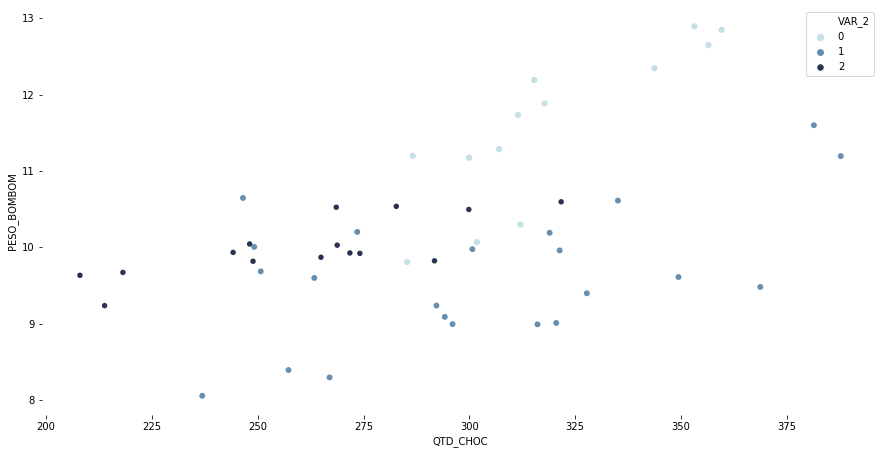

In [213]:
f, ax = plt.subplots(figsize=(15, 7.5))
sns.despine(f, left=True, bottom=True)

g_2 = sns.scatterplot(x="QTD_CHOC", y="PESO_BOMBOM",
                hue="VAR_2", size="VAR_2",
                palette="ch:r=-.2,d=.2",
                sizes=(40, 30), linewidth=0,
                data=df_preditiva, ax=ax)
display(g_2)

## 7 - Análise Prescritiva 

Nesta análise prescritiva usamos a média da quantidade de chocolate do modelo preditivo anterior devido ao seu range não ter variado muito o peso do bombom, isso é, ficou bem proximo dos valores de 9 a 10 gramas.

Sendo assim aplicamos a quantidade de 280,5 de chocolate para a entrada do processo.

In [241]:
#qtd_valor_ideial = list(filter(lambda x: x <= 0.99, df["winPlacePerc"]))

df_filtered = df_preditiva[(df_preditiva.PESO_BOMBOM >= 9.0) & (df_preditiva.PESO_BOMBOM <= 10.0)]
df_filtered.head()

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM
8,349.41,1.59,1,9.611264
10,321.34,2.29,1,9.959944
12,244.19,2.73,2,9.933184
14,263.38,2.56,1,9.598885
17,208.00,2.98,2,9.633584


In [256]:
#Fazendo uma média da quantidade de chocolate usada nos bombons de peso aceitavel.
qtd = len(df_filtered['QTD_CHOC'])
tot_qtd_choc = sum(df_filtered['QTD_CHOC'])
media_qtd_choc = tot_qtd_choc / qtd
media_qtd_choc


print( "Média da quantidade de chocolate usada nos bombons com peso aceitavel: ", round(media_qtd_choc,2))

print("Valor máximo da quantidade de chocolate que retornaram peso do bombom aceitavel: ",max(df_filtered['QTD_CHOC']))

print("Valor mínimo da quantidade de chocolate que retornaram peso do bombom aceitavel: ",min(df_filtered['QTD_CHOC']))

Média da quantidade de chocolate usada nos bombons com peso aceitavel:  280.5
Valor máximo da quantidade de chocolate que retornaram peso do bombom aceitavel:  368.74
Valor mínimo da quantidade de chocolate que retornaram peso do bombom aceitavel:  208.0


In [0]:
df_prescritiva = pd.read_excel('/content/drive/My Drive/GitHub/desafio-advanced-analytics/analise-prescritiva.xlsx')

In [259]:
df_prescritiva["QTD_CHOC"] = media_qtd_choc
df_prescritiva.head(5)

,QTD_CHOC,VAR_1,VAR_2
0,280.5025,2.07,C
1,280.5025,2.94,B
2,280.5025,2.53,B
3,280.5025,2.19,B
4,280.5025,2.02,C


In [260]:
#Transformando a Variavel VAR_2 em uma Variavel Numerica.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_prescritiva["VAR_2"] = label_encoder.fit_transform(df_prescritiva["VAR_2"])

df_prescritiva.head()

,QTD_CHOC,VAR_1,VAR_2
0,280.5025,2.07,2
1,280.5025,2.94,1
2,280.5025,2.53,1
3,280.5025,2.19,1
4,280.5025,2.02,2


Após criar a entrada com o valor de 280,5 de chocolate, aplicamos o modelo preditivo anterior para prever o peso final de cada bombom.

In [261]:
#executando o modelo em cima do dataset para predição
df_pred = random_forest.predict(df_prescritiva)
df_pred[0:5]

array([10.75138008, 10.92151465,  9.5899264 ,  9.95854759, 10.48244084])

In [262]:
df_pred = pd.DataFrame(data= df_pred)

#inserindo novamente o nome da coluna colunas
df_pred.columns = ['PESO_BOMBOM']

df_pred.head()

,PESO_BOMBOM
0,10.751380
1,10.921515
2,9.589926
3,9.958548
4,10.482441


In [263]:
df_prescritiva['PESO_BOMBOM'] = df_pred
df_prescritiva.head()

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM
0,280.5025,2.07,2,10.751380
1,280.5025,2.94,1,10.921515
2,280.5025,2.53,1,9.589926
3,280.5025,2.19,1,9.958548
4,280.5025,2.02,2,10.482441


In [0]:
#Salvando o arquivo
df_prescritiva.to_excel('/content/drive/My Drive/GitHub/desafio-advanced-analytics/resposta_analise-prescritiva.xlsx', index=False)

## 8 - Conclusão Parcial

Neste primeiro momento foi identificado uma grande variação dos dados nós fazendo assumir a hipotese de haver alguma feature que explique essa variação mas ainda não foi identificada dentro do processo. Onde será necessário retornar a etapa anterior e analisar novamente o processo com o intuído da encontrar alguma informação que venha a agregar neste momento.

Mas para a primeira entrega podemos considerar os ganhos abaixo:

* **No cenário anterior**

  Com 14.563,23 de chocolate eram produzidos 50 bombons com peso médio de 10,39 gramas, isso é, 291,5 de chocolate para cada bombom e 519 gramas de bombom a cada 50 unidades.
  Além de 73% dos bombons estarem fora da casa das 10 gramas, com variação de de 4,54 a 17,3 gramas em seu peso.
	

* **No cenário atual**

  Com 14.025,12 de chocolate serão produzidos 50 bomboms com peso médio de 10,15 gramas, isso é, 280,5 de chocolate para cada bombom e 507,5 gramas de bombom a cada 50 unidades.
	
* **Conclusão**

  Com o modelo, estamos economizando 538,11(3,7%) de chocolate para produzir a mesma quantidade. Além de produzir 50 bombons com 11,5 gramas a menos, e mantendo a variação em um range de 8,33 a 11,6, onde 68% dos bombons estão fora da casa das 10 gramas mas se limitando a um range bem menor, fazendo com que  menos unidades sejam descartadas.


OBS: A unidade de medida do chocolate de entrada não foi citado pois não foi informado no PDF da descrição do problema.